In [1]:
import pandas as pd 

In [38]:
def readcsv(dateiname):
    data = pd.read_csv(dateiname)
   
    return data


In [40]:
df = readcsv('players_15.csv')


df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,...,37+0,38+0,38+0,38+0,37+0,40+0,41+0,41+0,41+0,40+0
16151,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,...,31+0,30+0,30+0,30+0,31+0,32+0,31+0,31+0,31+0,32+0
16152,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,...,48+0,46+0,46+0,46+0,48+0,51+,53+,53+,53+,51+
16153,222947,https://sofifa.com/player/222947/tom-davies/15...,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,...,37+0,36+0,36+0,36+0,37+0,39+0,40+0,40+0,40+0,39+0


In [41]:
def readfiles():
    data = pd.read_csv('players_15.csv')
    
    data['Jahr'] = '2015'
    for i in range(16,22):
        df = pd.read_csv('players_'+str(i)+'.csv')
        df['Jahr'] = '20' + str(i)
        data = pd.concat([data, df])
    
    return data

In [42]:
def data_clean(data):
       
       df = data[['short_name', 'pace', 'shooting', 'passing', 'dribbling', 
       'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
       'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
       'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_strength', 'power_long_shots', 
       'mentality_aggression', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'Jahr', 'sofifa_id']]

       df = df.fillna(df.mean())
       names = df.short_name.tolist()
       year = df.Jahr.tolist()
       id = df.sofifa_id.tolist()
       df = df.drop(['sofifa_id'], axis=1)
       df = df.drop(['short_name'], axis=1)
       df = df.drop(['Jahr'], axis=1)

       return df, names, year, id

In [5]:
def skalieren(df):

    from sklearn import preprocessing

    x = df.values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    X_norm = pd.DataFrame(x_scaled)

    return X_norm

In [6]:
def PCAnalyse(X_norm):

    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    reduced = pd.DataFrame(pca.fit_transform(X_norm))
    
    return reduced


In [7]:
def elbow_method(reduced):

    from yellowbrick.cluster import KElbowVisualizer
    from sklearn.cluster import KMeans

    df1 = reduced.iloc[:, 0:2]

    model = KMeans()

    visualizer = KElbowVisualizer(model, k=(1,10))

    visualizer.fit(df1)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [8]:
def elbow_method2(reduced):

    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    
    SSE = []
    for cluster in range(1,10):
        kmeans = KMeans(n_clusters = cluster, init='k-means++')
        kmeans.fit(reduced)
        SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
    frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
    plt.figure(figsize=(12,6))
    plt.plot(frame['Cluster'], frame['SSE'], marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

In [9]:
def clustering(reduced):

    from sklearn.cluster import KMeans

    kmeans = KMeans(n_clusters=3, random_state=100)
    kmeans = kmeans.fit(reduced)
    labels = kmeans.predict(reduced)
    centroid = kmeans.cluster_centers_
    clusters = kmeans.labels_.tolist()

    return labels, clusters

In [10]:
def postprocessing(reduced, clusters, names):

        reduced['cluster'] = clusters
        reduced['name'] = names
        reduced.columns = ['x', 'y', 'cluster', 'name']
        return reduced

In [11]:
def cluster_visualisierung(reduced):

    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    sns.set(style = 'white')

    ax = sns.lmplot(x='x', y='y', hue='cluster', data = reduced, legend=False, fit_reg=False, size=15, scatter_kws={"s": 250})

    text = []
    for x, y, s in zip(reduced.x, reduced.y, reduced.name):
        text.append(plt.text(x,y,s))

    ax.set(ylim=(-2,2))
    plt.tick_params(labelsize=15)
    plt.xlabel("PC 1", fontsize=20)
    plt.ylabel("PC 2", fontsize=20)

    plt.show()

In [64]:
def final_cluster(reduced, year, id):

    df_neu = reduced.name.str.split(expand=True)


 #   df_neu['name']=df_neu.apply(lambda x: max(x.dropna() ,key=len), axis=1)
 #   reduced['name']=df_neu.apply(lambda x: max(x.dropna() ,key=len), axis=1)

    reduced['jahr'] = year
    reduced['id'] = id
    return reduced[['id','cluster', 'name', 'jahr']]

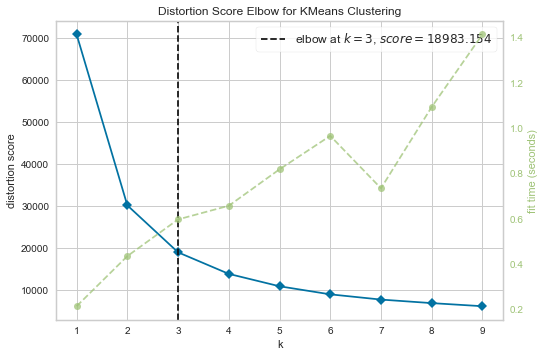

In [65]:
#data = readcsv('players_22.csv')
data = readfiles()
df, names, year, id = data_clean(data)
X_norm = skalieren(df)
reduced = PCAnalyse(X_norm)
reduced.columns = ['x', 'y']
elbow_method(reduced)
#elbow_method2(reduced)
labels, cluster = clustering(reduced)
postprocessing(reduced, cluster, names)
#cluster_visualisierung(reduced)
result = final_cluster(reduced, year, id)

In [66]:
result[result.name == 'Cristiano Ronaldo']

,id,cluster,name,jahr
1,20801,0,Cristiano Ronaldo,2015
16156,20801,0,Cristiano Ronaldo,2016
31778,20801,0,Cristiano Ronaldo,2017
49375,20801,0,Cristiano Ronaldo,2018
67329,20801,0,Cristiano Ronaldo,2019
85415,20801,0,Cristiano Ronaldo,2020
103898,20801,0,Cristiano Ronaldo,2021
